In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Text(0, 0.5, 'Percentage Signal Change')

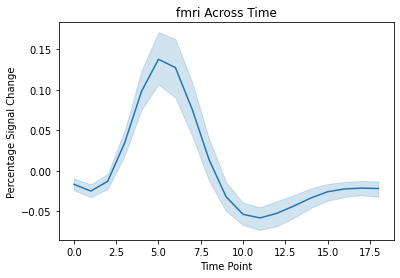

In [5]:
sns.lineplot(data=fmri, x='timepoint', y='signal')

plt.title('fmri Across Time')
plt.xlabel('Time Point')
plt.ylabel('Percentage Signal Change')

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

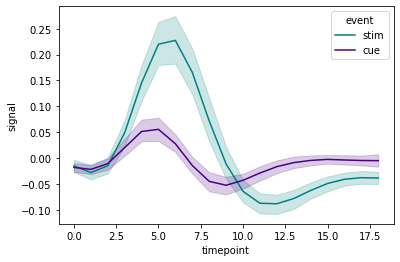

In [11]:
sns.lineplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='event',
    palette=['teal','indigo']
)

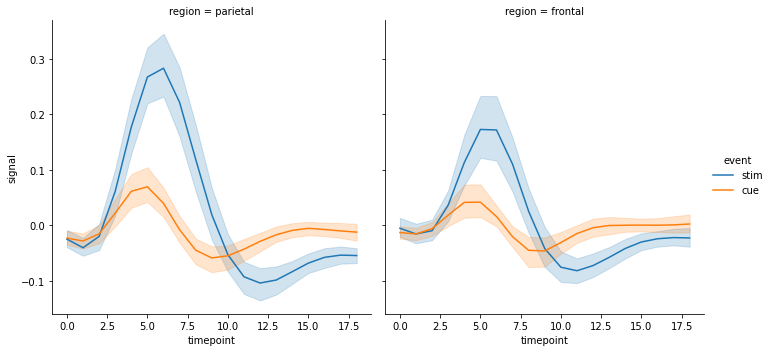

In [19]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='event',
    col='region',
    kind='line'
)

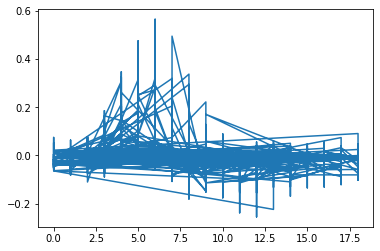

In [20]:
plt.plot(fmri['timepoint'], fmri['signal'])

In [21]:
data = fmri[['timepoint', 'signal']].groupby('timepoint').mean()
data.head()

,signal
timepoint,
0,-0.016662
1,-0.025002
2,-0.012873
3,0.034446
4,0.098194


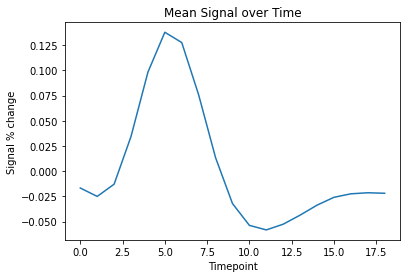

In [25]:
plt.plot(data)
plt.title("Mean Signal over Time")
plt.xlabel("Timepoint")
plt.ylabel("Signal % change")
plt.show()

In [27]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<BarContainer object of 244 artists>

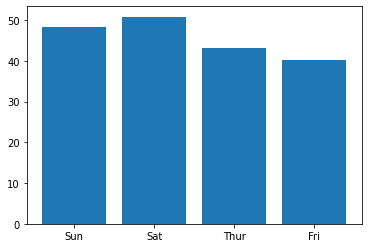

In [28]:
plt.bar(tips.day, tips.total_bill) # has plotted max value because matplot is dumb

In [35]:
mean_day = tips[['total_bill','day']].groupby('day').mean()
mean_day

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


<BarContainer object of 4 artists>

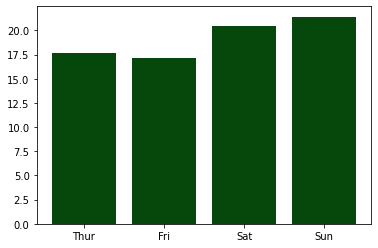

In [37]:
plt.bar(mean_day.index, mean_day['total_bill'], color='xkcd:forest green') # how we plot it as average of each day

In [31]:
tips.groupby('day').mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [32]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

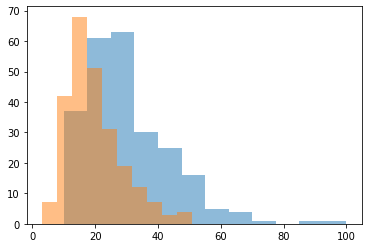

In [44]:
plt.hist(tips['tip'] * 10, bins=12, alpha=0.5)
plt.hist(tips['total_bill'], alpha=0.5)

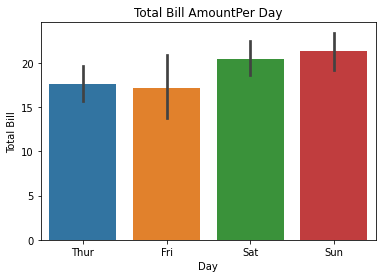

In [46]:
sns.barplot(data=tips, x='day', y='total_bill')

plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill AmountPer Day")
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='day'>

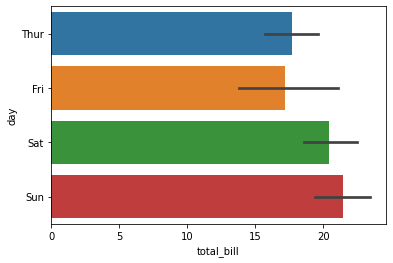

In [47]:
sns.barplot(data=tips, x="total_bill", y="day")

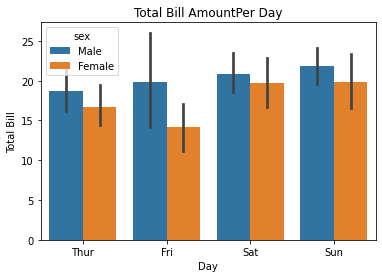

In [48]:
sns.barplot(data=tips, x='day', y='total_bill', hue='sex')

plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill AmountPer Day")
plt.show()

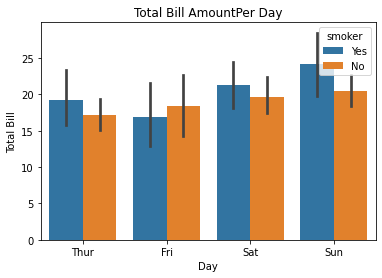

In [49]:
sns.barplot(data=tips, x='day', y='total_bill', hue='smoker')

plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill AmountPer Day")
plt.show()

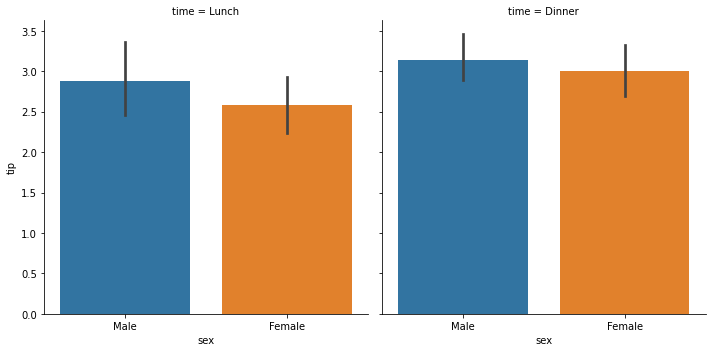

In [52]:
sns.catplot(
    data=tips,
    x='sex',
    y='tip',
    col='time',
    kind='bar'
)

In [53]:
tips['tip_pc'] = tips['tip']/tips['total_bill']

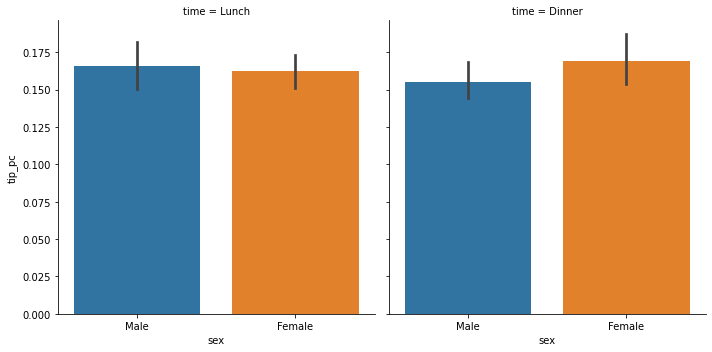

In [54]:
sns.catplot(
    data=tips,
    x='sex',
    y='tip_pc',
    col='time',
    kind='bar'
)

C:\Users\danza\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

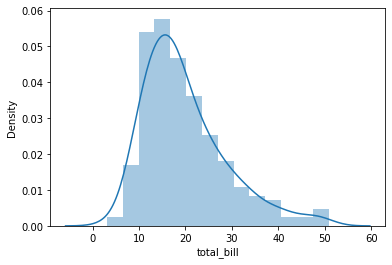

In [55]:
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

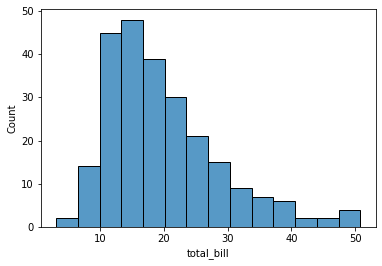

In [56]:
sns.histplot(tips['total_bill'])

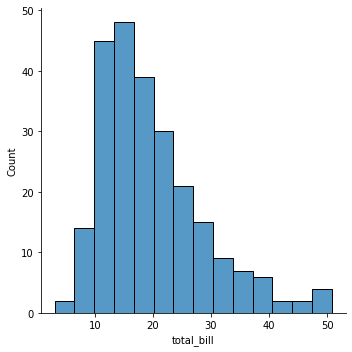

In [57]:
sns.displot(tips['total_bill'])

In [59]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


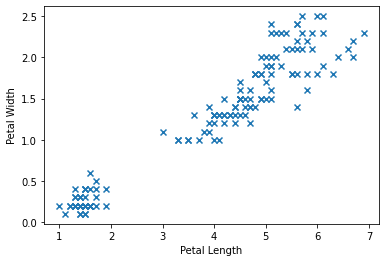

In [62]:
plt.scatter(iris['petal_length'], iris['petal_width'], marker='x')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

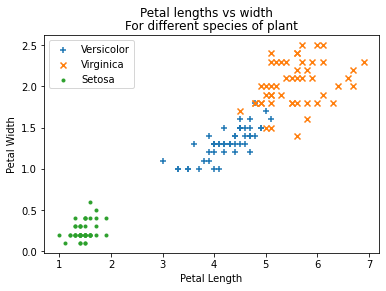

In [73]:
vers = iris[iris['species'] == 'versicolor']
virg = iris[iris['species'] == 'virginica']
seto = iris[iris['species'] == 'setosa']

plt.scatter(vers.petal_length, vers.petal_width, marker='+')
plt.scatter(virg.petal_length, virg.petal_width, marker='x')
plt.scatter(seto.petal_length, seto.petal_width, marker='.')

plt.xlabel('Petal Length')
plt.ylabel("Petal Width")
plt.legend(labels=['Versicolor', 'Virginica', 'Setosa']) # specify in order of plotting
plt.suptitle('Petal lengths vs width')
plt.title('For different species of plant')
plt.show()

In [66]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

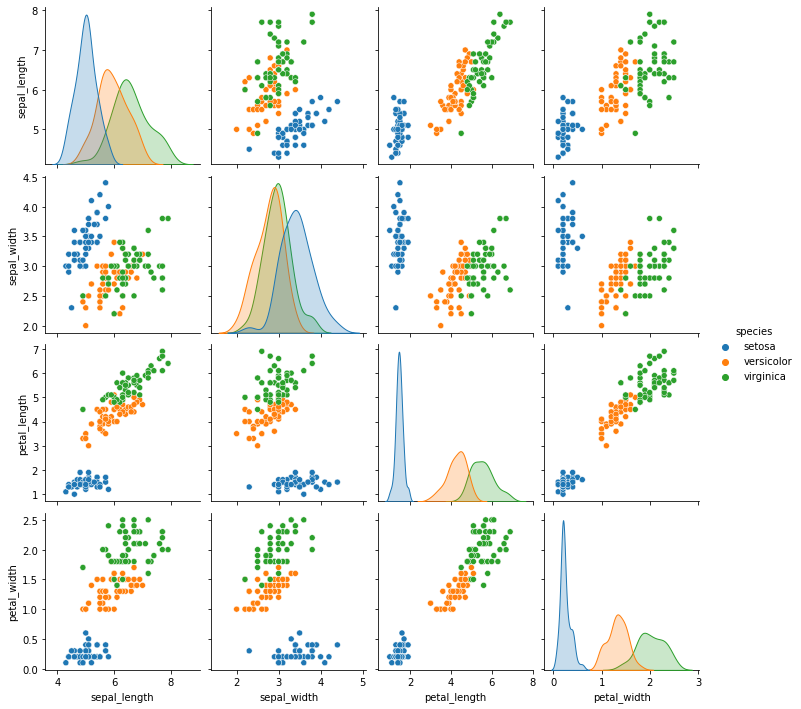

In [74]:
sns.pairplot(iris, hue='species')

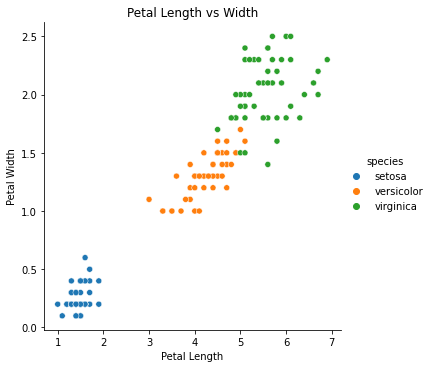

In [77]:
sns.relplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue='species'
).set(
    xlabel='Petal Length',
    ylabel='Petal Width',
    title='Petal Length vs Width'
)

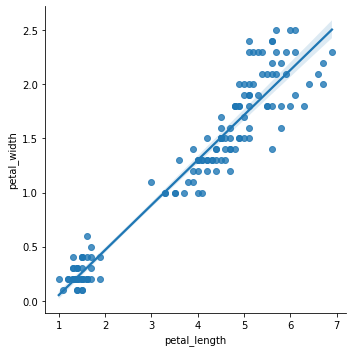

In [81]:
sns.lmplot(data=iris, x='petal_length', y='petal_width')

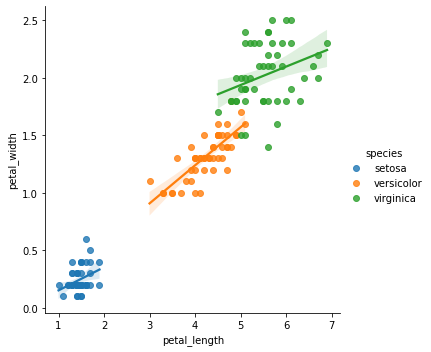

In [82]:
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')

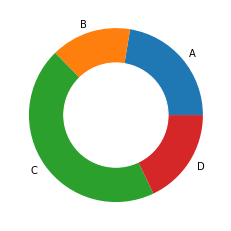

In [86]:
counts = [15,10,30,12]
plt.pie(counts, labels=['A','B','C','D'])
circle = plt.Circle((0,0), 0.6, color='white')
fig=plt.gcf()
fig.gca().add_artist(circle)
plt.show()

In [89]:
import squarify as sq

In [87]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
boarded = titanic.groupby('class').pclass.count()
boarded

class
First     216
Second    184
Third     491
Name: pclass, dtype: int64

(0.0, 100.0, 0.0, 100.0)

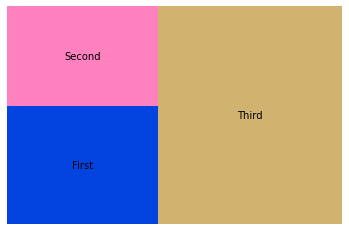

In [95]:
c = ['xkcd:blue','xkcd:pink','xkcd:tan']
sq.plot(boarded, label=boarded.index, color=c)
plt.axis('off')

<AxesSubplot:>

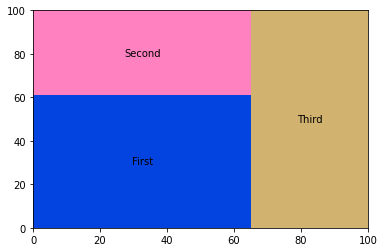

In [96]:
survived = titanic[titanic['alive'] == 'yes'].groupby('class').pclass.count()
sq.plot(survived, label=survived.index, color=c)
